In [14]:
import pandas as pd 
import numpy as np


In [2]:
import matplotlib.pyplot as plt


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
def self_attention(x):
    attn = layers.MultiHeadAttention(num_heads=2, key_dim=32)(x, x)
    return layers.Add()([x, attn])


In [6]:
generator_input = layers.Input(shape=(101,))
x = layers.Dense(256, activation='relu')(generator_input)
x = layers.Reshape((16, 16, 1))(x)
x = layers.Conv2DTranspose(64, (3,3), activation='relu', padding='same')(x)
x = self_attention(x)  
x = layers.Conv2DTranspose(1, (3,3), activation='sigmoid', padding='same')(x)
generator = keras.Model(generator_input, x)


In [7]:
discriminator_input = layers.Input(shape=(16, 16, 1))
x = layers.Conv2D(64, (3,3), activation='relu', padding='same')(discriminator_input)
x = self_attention(x)  
x = layers.Flatten()(x)
x = layers.Dense(1, activation='sigmoid')(x)
discriminator = keras.Model(discriminator_input, x)

In [8]:
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
gan_input = layers.Input(shape=(101,))
gan_output = discriminator(generator(gan_input))
gan = keras.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [15]:
noise = np.random.randn(1, 100)
label = np.random.randn(1, 1)
input_data = np.concatenate([noise, label], axis=1)
img = generator.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


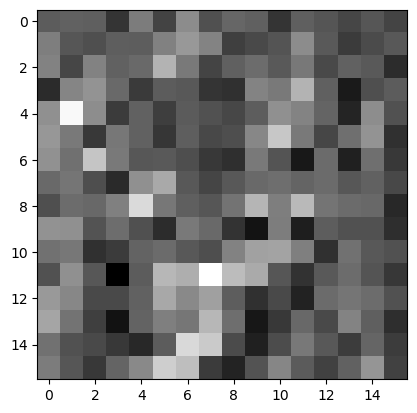

In [16]:
plt.imshow(img[0].squeeze(), cmap='gray')
plt.show()
